In [1]:
# Deep Learning Neural Network for the CIFAR-10 dataset
# Nov. 16th 2021
# PBA ML, Sila

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.datasets import cifar10

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
# Test that it is scaled

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[5400, 17, 9, 1]

0.27450982

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
# Describe the model that we will use here 

In [12]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 10)        490       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [24]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.6381 - accuracy: 0.4419 - val_loss: 1.7626 - val_accuracy: 0.3936
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6268 - accuracy: 0.4471 - val_loss: 1.7618 - val_accuracy: 0.3961
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6212 - accuracy: 0.4479 - val_loss: 1.7560 - val_accuracy: 0.3968
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6189 - accuracy: 0.4502 - val_loss: 1.7735 - val_accuracy: 0.3914
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6173 - accuracy: 0.4495 - val_loss: 1.7717 - val_accuracy: 0.3914
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6144 - accuracy: 0.4516 - val_loss: 1.7646 - val_accuracy: 0.3923
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6138 - accuracy: 0.4501 - val_loss: 1.7748 - val_ac

In [26]:
#Analysis

In [27]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 40ms/step - loss: 1.7874 - accuracy: 0.3875


[1.7874306440353394, 0.38749998807907104]

[ 352 5968 2033 8784 7778 3966 6632 5312 4122 6400]


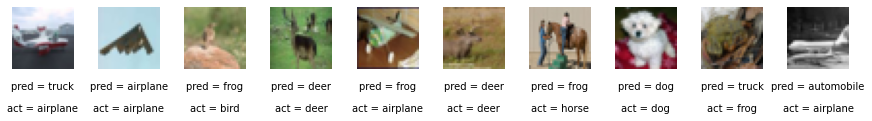